## <center> Практическое задание к лекции №2

**1.** Сгенерировать датасет при помощи *sklearn.datasets.make_regression* и
обучить линейную модель при помощи градиентного и стохастического градиентного
спуска. Нанести среднеквадратичную ошибку для обоих методов на один график,
сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)

Вектор весов данной модели

In [3]:
W_default

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

Расчитаем предсказания модели

In [4]:
y_pred_default = X @ W_default


Посчитаем $MSE$

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [6]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340433

Попробуем оптимизировать модель при помощи градиентного спуска: 

In [7]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse

    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [8]:
W_1, mse_1, score_1 = my_grad_desc(X, y, alpha=0.001, tol=0.00001)

Stop descent! iteration: 6764, weights: [17.0186161  54.47013129  4.75424543 63.30976693 93.39788214 71.04150391
 86.98578648 10.23644609  3.5111623  70.81225375], mse: 14.301239879776745


Реализуем $SGD$:

In [9]:
def my_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default 1e-04
    :param batch_size: bath_size, int default 1
    :param n_epoh: number of training epochs, int default 1e+06
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse
    the function stops when the tol or n_epoch parameter is reached
    
    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [10]:
W_2, mse_2, score_2 = my_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Stop descent! n_epoch: 5546, weights: [17.03599862 54.51871148  4.68761001 63.30907217 93.3325162  71.12505878
 86.89597673 10.13664682  3.53865575 70.69816707], mse: 11.000505297544208


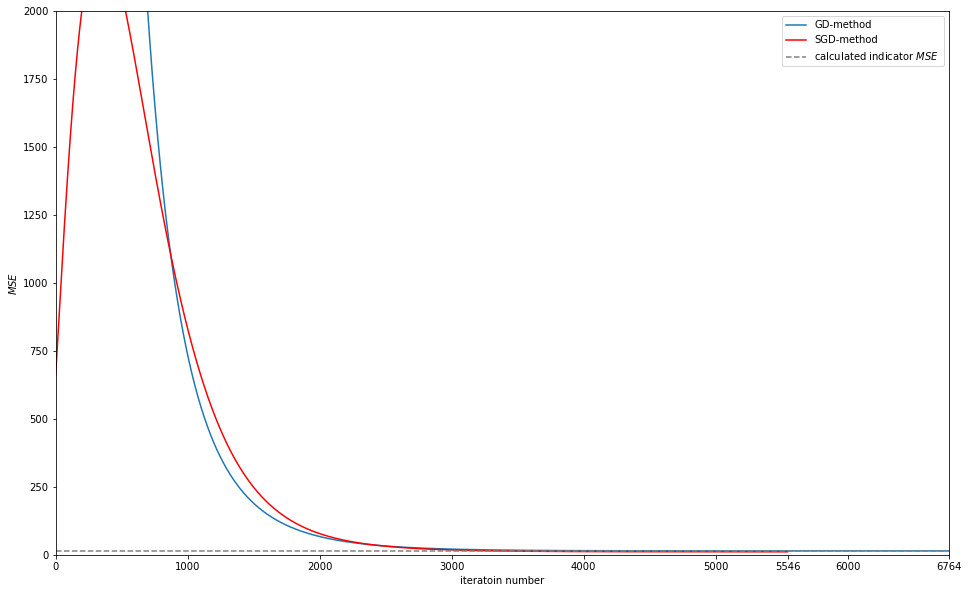

In [11]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

In [12]:
len(score_1)

6764

На основании графиков можно сделать вывод что примерно до 800-й итерации $SGD$ 'расходился'(значение $MSE$ росло), затем, до уроня 2300-2400 итераций оба алгоритма сходились, при этом скорость схождения $GD$ была выше, чем у $SGD$. Однако затем скорости уравнялись, и $SGD$ сошелся раньше чем $GD$ (5538 итераций против 6746).  

---

**2.** Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [13]:
# L2 (Евклидова) норма вектора
def euclid(vec):
    norm=0
    for i in vec:
        norm+=i**2
    return norm**0.5

Подкорректируем функции $GD$ и $SGD$:

In [14]:
def my_grad_desc_reg(X, y, alpha=1e-04, verbose=False, tol=0.0, lambda_=0.0):
    '''
    added L2 regularization
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default 1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :param lambda_: regularization factor float default 0.0 
    :return: weights array, mse

    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))+lambda_*W # добавим коэфф. лямбда для расчёта весов
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [15]:
W_3, mse_3, score_3 = my_grad_desc_reg(X, y, alpha=0.001, tol=0.00001, lambda_=0.0000001)

Stop descent! iteration: 6794, weights: [17.0185576  54.46683352  4.75452321 63.30672661 93.39289484 71.03859088
 86.98266324 10.2348001   3.51158025 70.80891754], mse: 14.301649483531746


In [16]:
def my_sgd_reg(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0, lambda_=0.0):
    '''
    added L2 regularization
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param batch_size: bath_size, int default=1
    :param n_epoh: number of training epochs, int default=1e+06
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :param lambda_: regularization factor float default 0.0
    :return: weights array, mse
    the function stops when the tol or n_epoch parameter is reached
    
    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)+lambda_*W
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [17]:
W_4, mse_4, score_4 = my_sgd_reg(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001, lambda_=0.0000001)

Stop descent! n_epoch: 5546, weights: [17.03404627 54.2691217   4.61467112 63.01581209 92.75091565 70.94889723
 86.45286648  9.8314564   3.61196123 70.22029774], mse: 14.569553690483753


Сравним полученные результаты:

In [18]:
df=pd.DataFrame(
    {
        'methods':['GD', 'SGD','GD + L2','SGD + L2'],
        r'$\lambda$-coeff':[None,None,0.001,0.001],
        'tol-value': 0.00001,
        'iterations': [len(it) for it in [score_1, score_2, score_3,score_4]],
        'err-value': [it[-1] for it in [score_1, score_2, score_3,score_4]]
    }
)
df

,methods,$\lambda$-coeff,tol-value,iterations,err-value
0,GD,NaN,0.00001,6764,14.301230
1,SGD,NaN,0.00001,5546,11.000495
2,GD + L2,0.001,0.00001,6794,14.301639
3,SGD + L2,0.001,0.00001,5546,14.569544


Сравним изменение весов:

In [19]:
df2=pd.DataFrame({'GD':W_1, 'SGD':W_2,'GD + L2':W_3,'SGD + L2':W_4}, index=['weigt'+str(i) for i in range(10)])
df2

,GD,SGD,GD + L2,SGD + L2
weigt0,17.018610,17.035999,17.018552,17.034046
weigt1,54.470108,54.518711,54.466811,54.269122
weigt2,4.754276,4.687610,4.754552,4.614671
weigt3,63.309766,63.309072,63.306726,63.015812
weigt4,93.397910,93.332516,93.392922,92.750916
weigt5,71.041466,71.125059,71.038555,70.948897
weigt6,86.985827,86.895977,86.982703,86.452866
weigt7,10.236491,10.136647,10.234843,9.831456
weigt8,3.511151,3.538656,3.511569,3.611961
weigt9,70.812304,70.698167,70.808966,70.220298


На графике значения "слипаются"

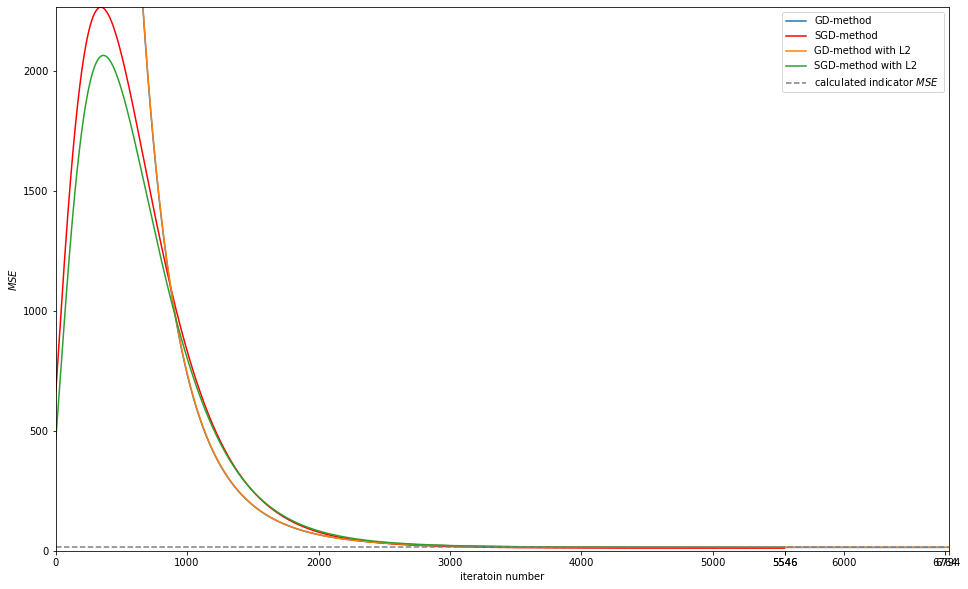

In [20]:
plt.figure(figsize=(16, 10))
plt.ylim((0,np.max([np.max(score_2),np.max(score_4)])))
plt.xlim((0,np.max([len(score_1), len(score_2), len(score_3), len(score_4)])-1000))
plt.plot([x for x in range(1, len(score_1) + 1)], score_1, label='GD-method')
plt.plot([x for x in range(1, len(score_2) + 1)], score_2, c='r', label='SGD-method')
plt.plot([x for x in range(1, len(score_3) + 1)], score_3, label='GD-method with L2')
plt.plot([x for x in range(1, len(score_4) + 1)], score_4, label='SGD-method with L2')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2), len(score_3), len(score_4)])
plt.xlabel('iteratoin number')
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()